## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results=pd.merge(study_results,mouse_metadata,on='Mouse ID', how='outer')
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice in the DataFrame.
mousecount=len(mouse_study_results['Mouse ID'].unique())
mousecount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_micecount=mouse_study_results.loc[mouse_study_results.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_micecount


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_g989=mouse_study_results.loc[mouse_study_results['Mouse ID']=='g989']
duplicate_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
len(mouse_study_results)

1893

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= mouse_study_results.drop_duplicates(subset=['Mouse ID','Timepoint'], keep = 'first')
clean_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean_df=clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_mean_df
tumor_median_df=clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_median_df
tumor_var_df=clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_var_df
tumor_stdev_df=clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_stdev_df
tumor_sem_df=clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
tumor_sem_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df=pd.DataFrame({'tumor_mean':tumor_mean_df,'tumor_median':tumor_median_df,'tumor_var':tumor_var_df,'tumor_stdev':tumor_stdev_df,'tumor_SEM':tumor_sem_df})
summary_df

,tumor_mean,tumor_median,tumor_var,tumor_stdev,tumor_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

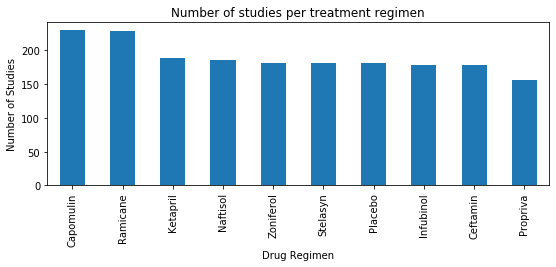

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_mouse=clean_df['Drug Regimen'].value_counts()
count_mouse

count_mouse.plot(kind="bar", figsize=(9,3))
plt.title("Number of studies per treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Studies")
plt.show()
plt.tight_layout()

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count_mouse=clean_df['Drug Regimen'].value_counts()
count_mouse

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

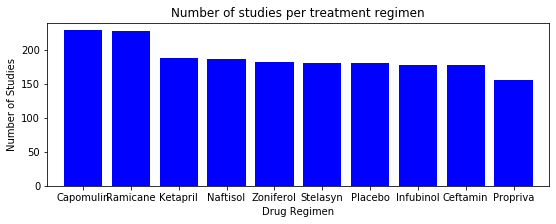

In [12]:
plt.figure(figsize=(9,3))
plt.bar(count_mouse.index.values,count_mouse.values, color="b", align="center")
x_axis = np.arange(len(count_mouse.index.values))
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(count_mouse.values)+10)
plt.title("Number of studies per treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Studies")
plt.bar

## Pie Plots

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

female_mice=clean_df.loc[clean_df['Sex']=='Female','Mouse ID'].count()
female_mice
male_mice=clean_df.loc[clean_df['Sex']=='Male','Mouse ID'].count()
male_mice
total=female_mice+male_mice
total
percent_female=female_mice/total*100
percent_female
percent_male=male_mice/total*100
percent_male

50.74152542372882

([<matplotlib.patches.Wedge at 0x24881bc6c08>,
 [Text(-0.7595256522019519, -0.8634933605113592, 'Female'),
  Text(0.7265027977583889, 0.8259501709239085, 'Male')],
 [Text(-0.4292971077663206, -0.48806146463685507, '49.26%'),
  Text(0.3962742533227575, 0.4505182750494046, '50.74%')])

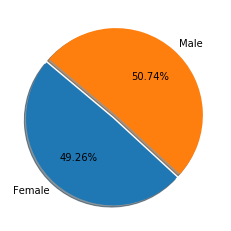

In [14]:
x_axis=['Female','Male']
x_axis
y_axis=[percent_female,percent_male]
y_axis
explode = (0.05,0)

plt.pie(y_axis, explode=explode, labels=x_axis,
        autopct="%1.2f%%", shadow=True, startangle=140)

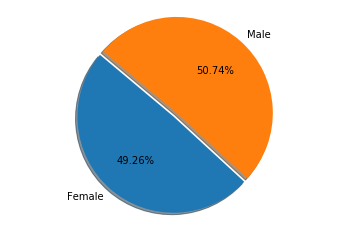

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis=['Female','Male']
x_axis
y_axis=[percent_female,percent_male]
y_axis
explode = (0.05,0)

plt.pie(y_axis, explode=explode, labels=x_axis, autopct="%1.2f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug1_df=clean_df.loc[clean_df['Drug Regimen']=='Capomulin',:]
drug2_df=clean_df.loc[clean_df['Drug Regimen']=='Ramicane',:]
drug3_df=clean_df.loc[clean_df['Drug Regimen']=='Infubinol',:]  
drug4_df=clean_df.loc[clean_df['Drug Regimen']=='Ceftamin',:]   
drug1_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [17]:
max_time_bymouse_drug1 = drug1_df.groupby('Mouse ID').last()
max_time_bymouse_drug1
max_time_bymouse_drug2 = drug2_df.groupby('Mouse ID').last()
max_time_bymouse_drug2
max_time_bymouse_drug3 = drug3_df.groupby('Mouse ID').last()
max_time_bymouse_drug3
max_time_bymouse_drug4 = drug4_df.groupby('Mouse ID').last()
max_time_bymouse_drug4



,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a275,45,62.999356,3,Ceftamin,Female,20,28
b447,0,45.000000,0,Ceftamin,Male,2,30
b487,25,56.057749,1,Ceftamin,Female,6,28
b759,30,55.742829,1,Ceftamin,Female,12,25
f436,15,48.722078,2,Ceftamin,Female,3,25
h531,5,47.784682,0,Ceftamin,Male,5,27
j296,45,61.849023,3,Ceftamin,Female,24,30
k210,45,68.923185,3,Ceftamin,Male,15,28
l471,45,67.748662,1,Ceftamin,Female,7,28


In [18]:
volume1=max_time_bymouse_drug1['Tumor Volume (mm3)']
volume1
volume2=max_time_bymouse_drug2['Tumor Volume (mm3)']
volume2
volume3=max_time_bymouse_drug3['Tumor Volume (mm3)']
volume3
volume4=max_time_bymouse_drug4['Tumor Volume (mm3)']
volume4

Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
h531    47.784682
j296    61.849023
k210    68.923185
l471    67.748662
l490    57.918381
l558    46.784535
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
q483    64.192341
t573    45.000000
u149    52.925348
u153    45.000000
w151    67.527482
x226    45.000000
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [19]:
quartiles = volume1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartiles = volume2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartiles = volume3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

quartiles = volume4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of temperatures is: 48.72207785
The upper quartil

In [20]:
list1=volume1.tolist()
list1
list2=volume2.tolist()
list2
list3=volume3.tolist()
list3
list4=volume4.tolist()
list4

[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.784681799999994,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

In [21]:
list1.sort()
print(list1)
list2.sort()
print(list2)
list3.sort()
print(list3)
list4.sort()
print(list4)

[23.34359787, 28.43096411, 28.48403281, 30.48598484, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 36.04104736, 37.07402422, 37.31184577, 38.125164399999996, 38.75326548, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 46.53920617, 47.68596303]
[22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.09533505, 31.56046955, 32.97852192, 33.39765251, 33.56240217, 36.13485243, 36.37451039, 36.56165229, 37.22565033, 37.31123552, 38.34200823, 38.407618299999996, 38.81036633, 40.65900627, 40.66771292, 43.04754260000001, 43.16637266, 43.41938077, 44.18345092, 45.22086888]
[36.321345799999996, 45.69933088, 46.25011212, 47.01036401, 50.00513807, 51.54243058, 54.04860769, 54.65654872, 55.62942846, 55.65068132, 57.03186187, 58.26844248, 60.16518046, 60.91876652, 60.96971133, 62.11727887, 62.43540402, 62.75445141, 65.52574285, 66.08306589, 66.19691151, 67.28962147, 67.68556862, 67.97341878, 72

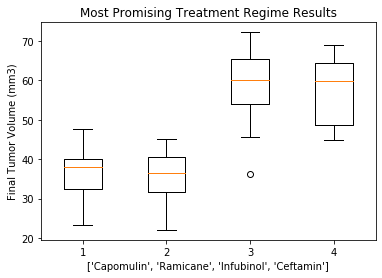

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.set_title('Most Promising Treatment Regime Results')
ax.set_xlabel(['Capomulin','Ramicane','Infubinol','Ceftamin'])
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot([list1,list2,list3,list4])
plt.show()



## Line and Scatter Plots

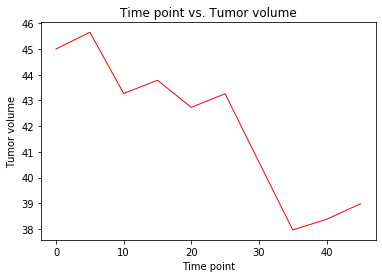

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_data =drug1_df.loc[drug1_df['Mouse ID']=='b128',['Timepoint','Tumor Volume (mm3)']]
mouse_data
x_axis=mouse_data['Timepoint']
x_axis.tolist()
y_axis=mouse_data['Tumor Volume (mm3)']
y_axis.tolist()

plt.title("Time point vs. Tumor volume")
plt.xlabel("Time point")
plt.ylabel("Tumor volume")

plt.plot(x_axis.tolist(),y_axis.tolist(), color="red", linewidth=1)
plt.show()

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_volume=drug1_df.groupby('Weight (g)').mean()['Tumor Volume (mm3)']
tumor_volume


Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [25]:
tumor_volume_pd=pd.DataFrame(tumor_volume)
tumor_volume_pd.reset_index(inplace=True)
tumor_volume_pd

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [26]:
weight = tumor_volume_pd.iloc[:,0]
weight
aver_tumor_volume=tumor_volume_pd.iloc[:,1]
aver_tumor_volume

0    36.182040
1    37.214133
2    41.182391
3    39.141053
4    42.088700
5    43.288490
6    43.341051
7    44.805810
8    44.062109
Name: Tumor Volume (mm3), dtype: float64

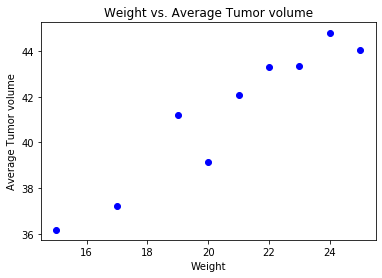

In [43]:
plt.title("Weight vs. Average Tumor volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor volume")

plt.scatter(weight,aver_tumor_volume,color="blue")
plt.show()

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = tumor_volume_pd.iloc[:,0]
weight
aver_tumor_volume=tumor_volume_pd.iloc[:,1]
aver_tumor_volume
correlation = st.pearsonr(weight,aver_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.95


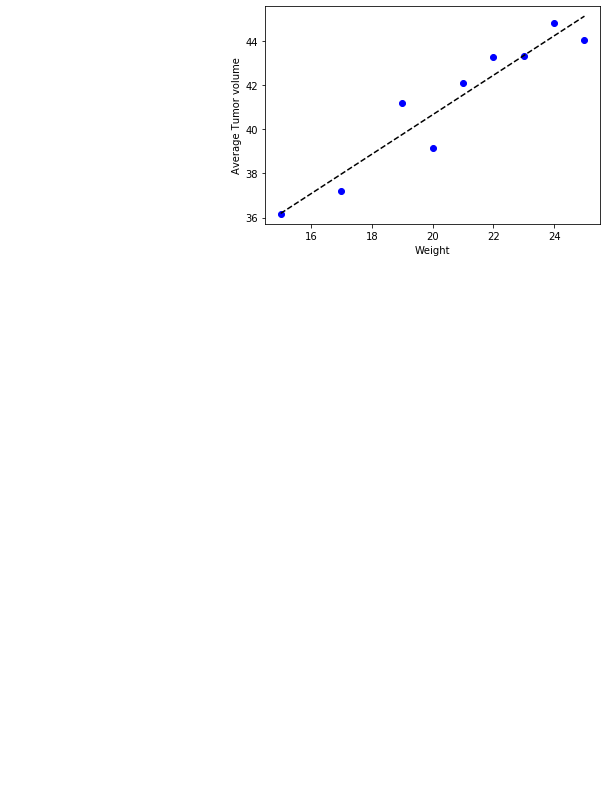

In [44]:
x_values = weight
y_values = aver_tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color="blue")
plt.plot(x_values,regress_values,"k--")
plt.annotate(line_eq,(6,10),fontsize=15)
plt.xlabel('Weight')
plt.ylabel('Average Tumor volume')
plt.show()